In [1]:
import pickle
from collections import Counter

In [91]:
counteds = {}
for year in range(1980, 1999+1):
    counteds[year] = {}
    with open(f'./data/komoran_counter_{year}_chosun.pickle', 'rb') as f:
        counteds[year]['chosun'] = pickle.load(f)
    with open(f'./data/komoran_counter_{year}_donga.pickle', 'rb') as f:
        counteds[year]['donga'] = pickle.load(f)

In [92]:
def visualize_words(dict_data, papers, ax, scope, words, values=True):
    x = list(range(scope[0], scope[1]+1))
    ys = {}

    for word in words:
        for paper in papers:
            if word not in ys.keys():
                ys[word] = {}
            if paper not in ys[word].keys():
                ys[word][paper] = []
            for year in range(scope[0], scope[1]+1):
                s = sum(dict_data[year][paper].values())
                if word in dict_data[year][paper].keys():
                    ys[word][paper].append(dict_data[year][paper][word]/s)
                else:
                    ys[word][paper].append(None)

    r = []
    for word, v in ys.items():
        for paper, y in v.items():
            r += y
            if len(ax.lines) % 2 == 0:
                ax.plot(x, y, label=f"{word} {paper}", marker='o')
            else:
                ax.plot(x, y, label=f"{word} {paper}", marker='x', c=ax.lines[-1].get_color())
            
            if values:
                for i in range(len(x)):
                    if y[i] is not None:
                        ax.text(x[i], y[i], fr'{y[i]*1e6:.2f}$\mu$', ha='center', va='bottom', size = 12)
    m = max([i for i in r if i is not None])

    ax.set_ylim(0, m*1.1)
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45)
    ax.legend()
    ax.grid(True)
    return ys

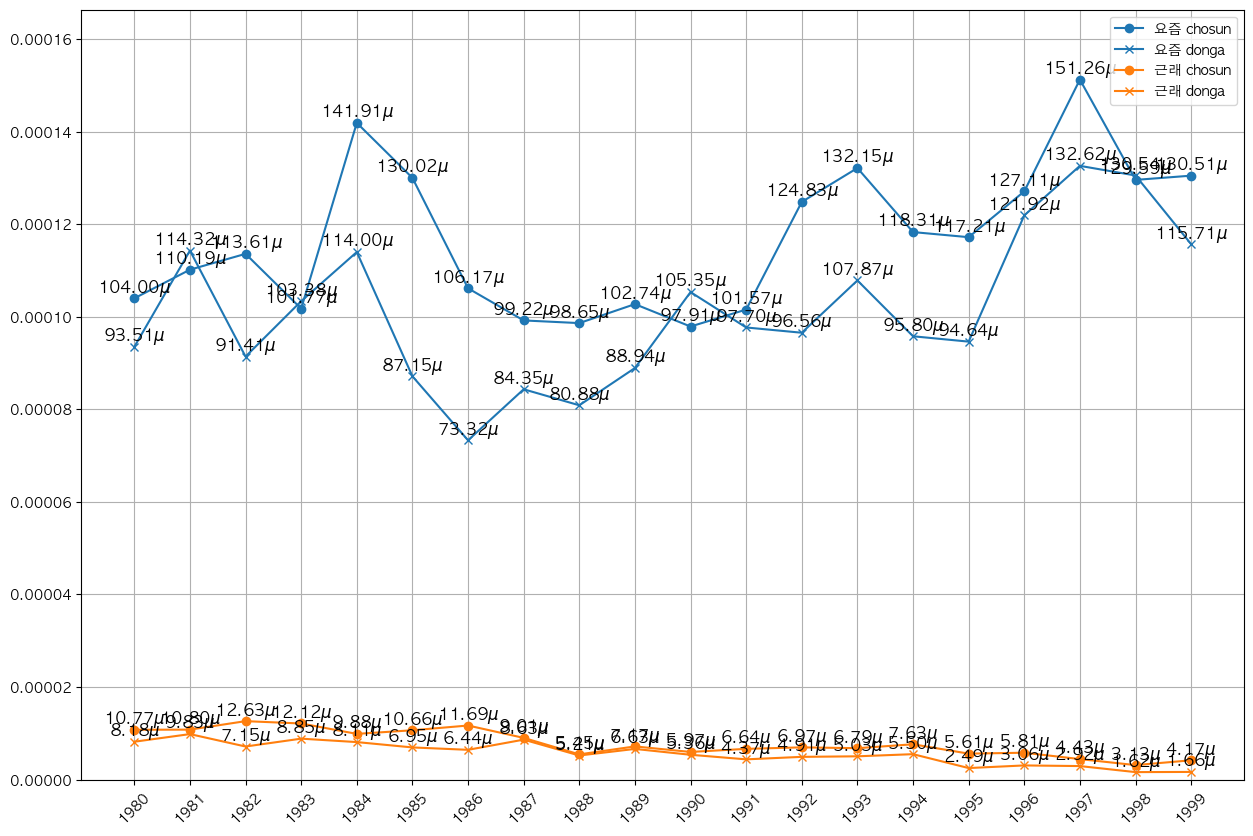

In [101]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(15, 10))

ys = visualize_words(counteds, ['chosun', 'donga'], ax, (1980, 1999), ['요즘', '근래'], values=True)

plt.show()

In [106]:
r = Counter()
for v in counteds.values():
    for vv in v.values():
        r += vv